---

# Brief Houses Prices
---

![cars](https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/image/png/ffd16b55-4723-4db0-b3b3-807362b61946.png)

---

## Contexte du projet
* Etape 1 : Recuperer la base de donnée train.csv
* Etape 2 : Comprendre la signification de chaque colonne : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
* Etape 3 : Créer un notebook avec un titre et importer train.csv dans un dataframe
* Etape 4 : Réaliser une analyse exploratoire (moyenne, ecart-type, mediane, identifier les valeurs manquantes, correlations, data visualisation) ==> Privilegier la qualité de l'analyse plutôt que la quantité de cellule executé.
* Etape 5 : Faites une regression lineaire avec une feature. Choisir une feature qui n'a pas besoin d'être transformée).
* Etape 6 : Faites une regression lineaire avec Stats model et interpreter les résultats.
* Etape 7 : Faites une regression lineaire avec sklearn et interpreter les resultats : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
* Etape 8 (Objectif) : Réaliser une prediction avec sklearn. Exemple : Prédire le prix d'un logement qui fait 58m2.
* Etape 9 Optionnel level 1 : Separer les données d'entrainement et données de test (test.csv) : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* Etape 10 : Revenir à l'étape 7 et faire un .fit(X_train) avec les données d'entrainement et un .score(X_test) sur les données de test. (cf sklearn).
* Etape 11 : Comparer la difference de score entre l'entrainement avec de la fuite de donnée ( .fit(X_train, et un .score(y_train) ) et sans fuite de donnée (.fit(X_train) .score(y_test) interpreter.
* Etape 12 Optionnel Level 2 : Ajouter une feature supplémentaire (qui vous semble pertinante) à votre model pour essayer d'ameliorer les performances de votre model. Vous aurez probablement besoin d'utiliser cet outil de sklearn par exemple : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
* Etape 13 Optionnel Level 3: Structurer votre code avec par exemple :
    * Un fichier data.py > avec une methode .get_data()
    * Un fichier model.py > avec une methode .train()
    * Un fichier preprocessing.py > avec une methode .cleaning() et .preprocessing_'colum_name'()

In [1]:
from model import Model
from get_data import GetData

In [2]:
data = GetData('train.csv')
df = data.df

In [3]:
data.df_info()


        Longueur du dataset : 1460 enregistrements
        Nombre de colonnes : 81
        Nombre total de celulles non nulles : 111295
        Nombre total de cellules nulles : 6965, soit 5.89 %
        


,colonne,type,Echantillon,% de valeurs nulles
Id,Id,int64,"[1, 2, 3, 4, 5]",0.00
MSSubClass,MSSubClass,int64,"[60, 20, 60, 70, 60]",0.00
MSZoning,MSZoning,object,"['RL', 'RL', 'RL', 'RL', 'RL']",0.00
LotFrontage,LotFrontage,float64,"[65.0, 80.0, 68.0, 60.0, 84.0]",17.74
LotArea,LotArea,int64,"[8450, 9600, 11250, 9550, 14260]",0.00
...,...,...,...,...
MoSold,MoSold,int64,"[2, 5, 9, 2, 12]",0.00
YrSold,YrSold,int64,"[2008, 2007, 2008, 2006, 2008]",0.00
SaleType,SaleType,object,"['WD', 'WD', 'WD', 'WD', 'WD']",0.00
SaleCondition,SaleCondition,object,"['Normal', 'Normal', 'Normal', 'Abnorml', 'Nor...",0.00


Analyse de la feature SalePrice


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

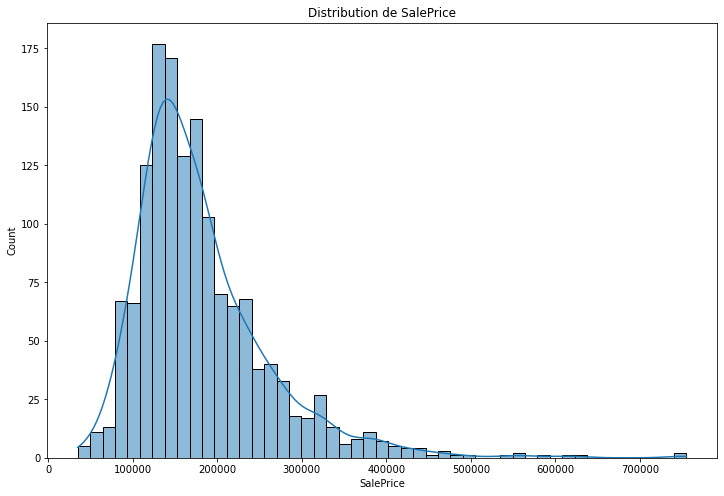

In [4]:
data.f_look('SalePrice')

> La variable a une moyenne de 180921 avec une médiane de 163000, et un écart-type de 79442.5
> On peut en dire que la médiane et la moyenne sont différentes, et donc que SalePrice n'est pas exactement distribuée selon la loi normale car elle présente de nombreuses valeurs extrêmes et par conséquent un skewness sur la droite.
> On peut aussi dire que plus de 50% (médiane) des biens vendus sont situés sous la moyenne.

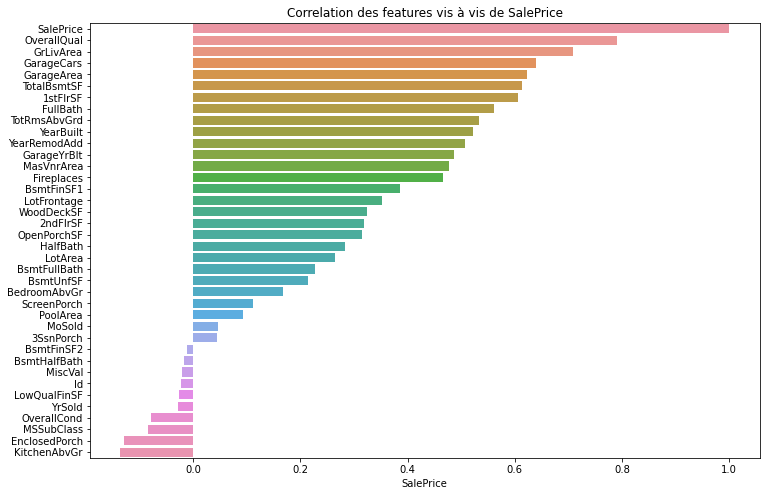

In [5]:
data.df_corr('SalePrice')

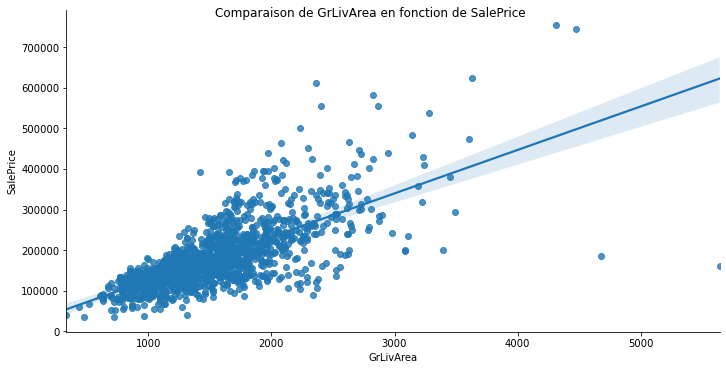

In [6]:
data.kompare('GrLivArea','SalePrice')

Analyse de la feature GrLivArea


count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

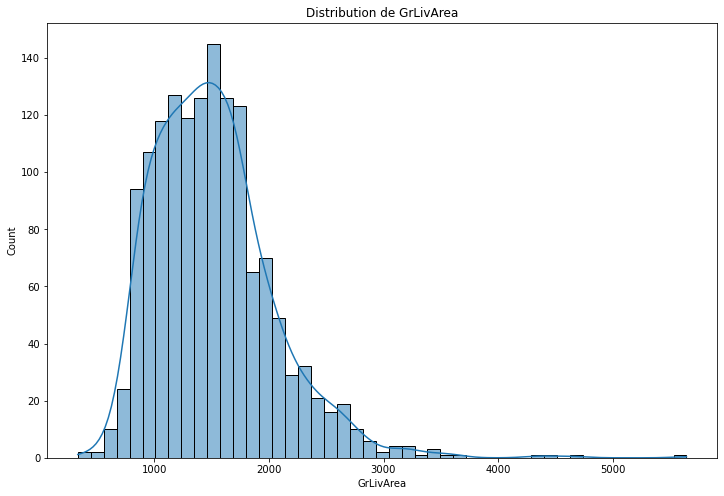

In [7]:
data.f_look('GrLivArea')

In [8]:
model = Model(data.df,'SalePrice',['GrLivArea'])

In [9]:
model.sm_regression()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Thu, 20 May 2021   Prob (F-statistic):          4.52e-223
Time:                        18:00:15   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> On a un R carré de 0,5, ce qui signifie que nos données d'observations ne vont correspondre qu'à 50% des données attendues avec une fonction f(P-value) très proche de 0. donc l'évaluation de la performance du modele est fiable.

> La feature a un coefficient de 107 avec une P.value très faible. Donc la valaeur de ce coefficient est fiable.

In [10]:
model.sk_regression(model.df)

La constante est égale à : 18569.02585648728
Les coefficients directeurs sont respectivement de : [107.13035897]
le R² est de : 0.5021486502718042


> Le modèle nous renvoie la même chose que stats model

## Prediction d'un logement de 1710 pieds carré soit 159 m carré

In [11]:
a = data.df['SalePrice'][data.df['GrLivArea'] == 1710].iloc[0]
b = round(model.sk_predict([[1710]])[0],2)

print(f"""
Valeur attendue = {a} feet2
Prédiction du modèle : {b} feet2
soit un écart de  : {round(abs(b-a)/a*100,2)} % d'écart
""")


Valeur attendue = 208500 feet2
Prédiction du modèle : 201761.94 feet2
soit un écart de  : 3.23 % d'écart



In [12]:
model.cut_df()

,SalePrice,GrLivArea
0,208500,1710


,SalePrice,GrLivArea
0,176485,1302


In [13]:
model.train

,SalePrice,GrLivArea
0,176485,1302
1,142500,1141
2,176500,1414
3,155000,1215
4,103000,1208
...,...,...
1163,145000,990
1164,123000,894
1165,402000,2448
1166,110000,1203


In [14]:
model.sk_regression(model.train)

La constante est égale à : 14297.063319022913
Les coefficients directeurs sont respectivement de : [109.62650353]
le R² est de : 0.5386899495086972


In [15]:
model.sk_predict_test(model.test)

R² = 0.38


,Valeur Attendu,Prédiction
1168,119900,120086.639224
1169,151500,119319.253699
1170,80000,124581.325869
1171,193879,156153.758885
1172,196500,202196.890367
...,...,...
1455,306000,201100.625332
1456,82500,168980.059798
1457,236500,191453.493021
1458,179900,172378.481407


In [16]:
model2 = Model(data.df,'SalePrice',['GrLivArea','OverallQual'])

In [17]:
model2.cut_df()

,SalePrice,GrLivArea,OverallQual
0,208500,1710,7


,SalePrice,GrLivArea,OverallQual
0,124500,864,4


In [18]:
model2.sk_regression(model2.train)

La constante est égale à : -104147.54206486681
Les coefficients directeurs sont respectivement de : [   55.36730805 32873.23350844]
le R² est de : 0.7154159499010337


In [19]:
model2.sk_predict_test(model2.test)

R² = 0.71


,Valeur Attendu,Prédiction
1168,200500,231082.138130
1169,115000,117136.218156
1170,139400,118686.502782
1171,114504,168834.336403
1172,236000,233875.975890
...,...,...
1455,147000,110713.610422
1456,200000,218609.546343
1457,175000,206026.219939
1458,79000,153774.428612
